# Ejercicio No 1: Búsqueda por anchura


## Nombre:

###       Fernando Sanchez

## Enunciado:

### •	Diseñe un grafo similar al que se ha presentado en este ejercicio partiendo de las siguientes coordenadas de latitud y longitud: -2.8801604,-79.0071712. Para ello deberá realizar las siguientes tareas:

    Emplear la herramienta Google Maps (R) con las coordenadas antes indicadas (Link).

    Definir 11 puntos de interés (El Vecino, Bellavista, Loja Argelia, Misicata, etc.) y armar el grafo.

    11 Puntos de interes
    
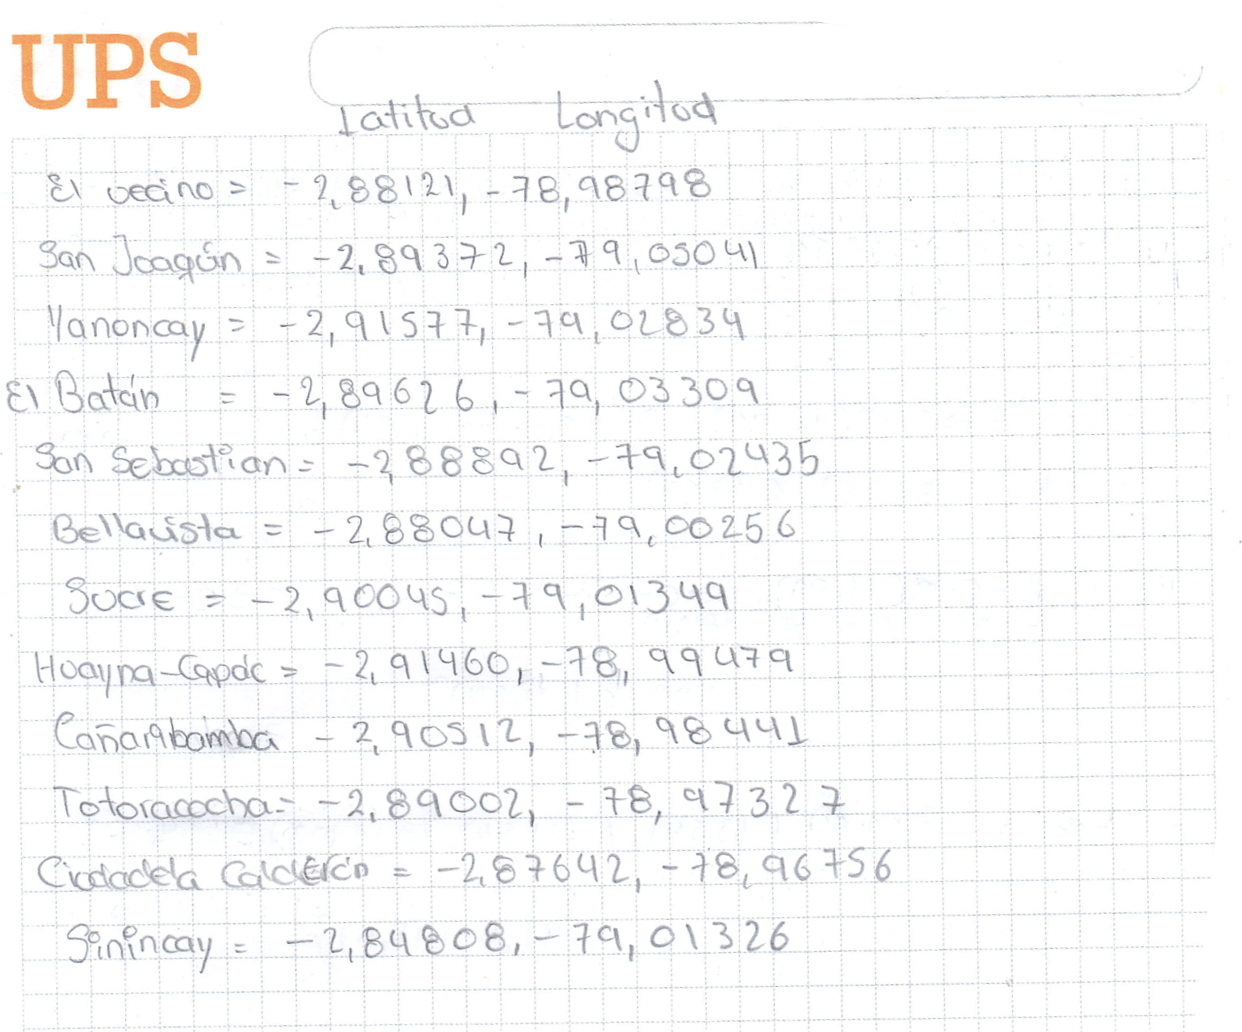

    Grafo

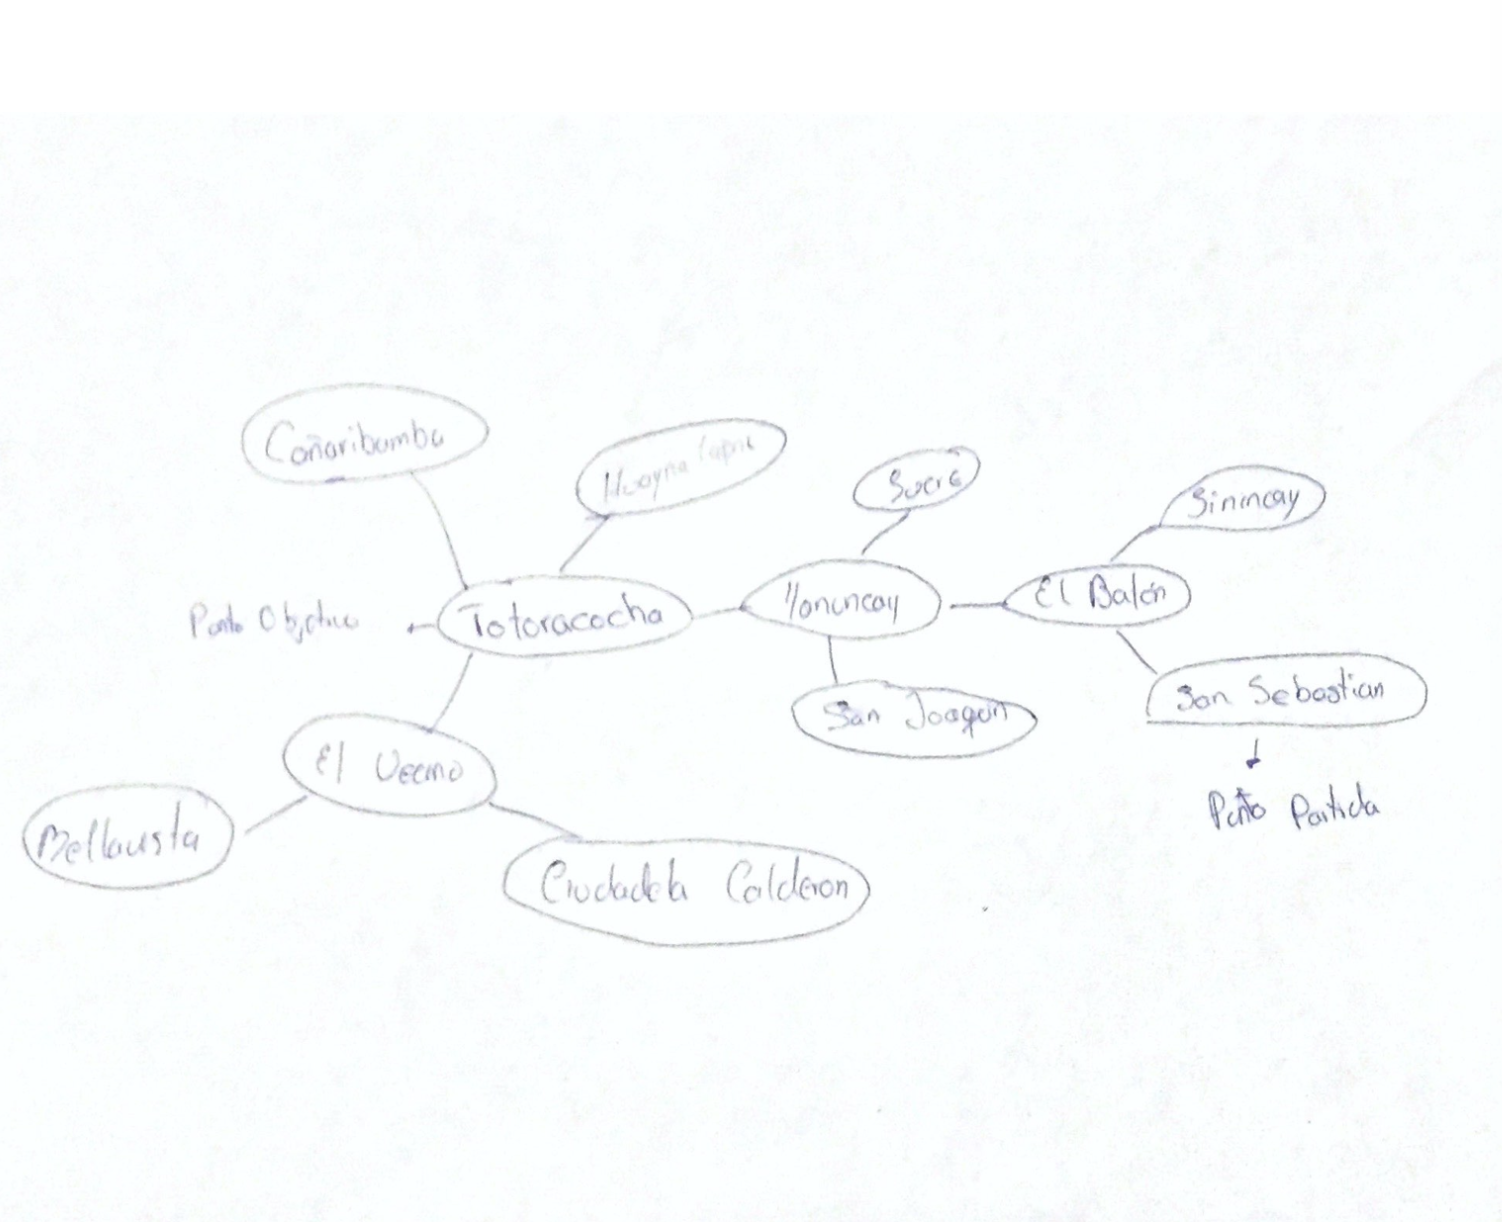
    
    Especificar como punto de partida al sector "San Sebastián" y como objetivo "Totoracocha".
    
        1) Punto de partida: San Sebastián"
        2) Punto objetivo: Totoracocha
        
    Establecer los arcos o caminos en 1 sola dirección, por ejemplo, del nodo "Bellavista" al nodo "Loja 
    Argelia".
    
    Realizar el proceso de búsqueda de forma similar a cómo se a explicado en este apartado, almacenando para 
    ello los datos de la lista Visitados y de la Cola.


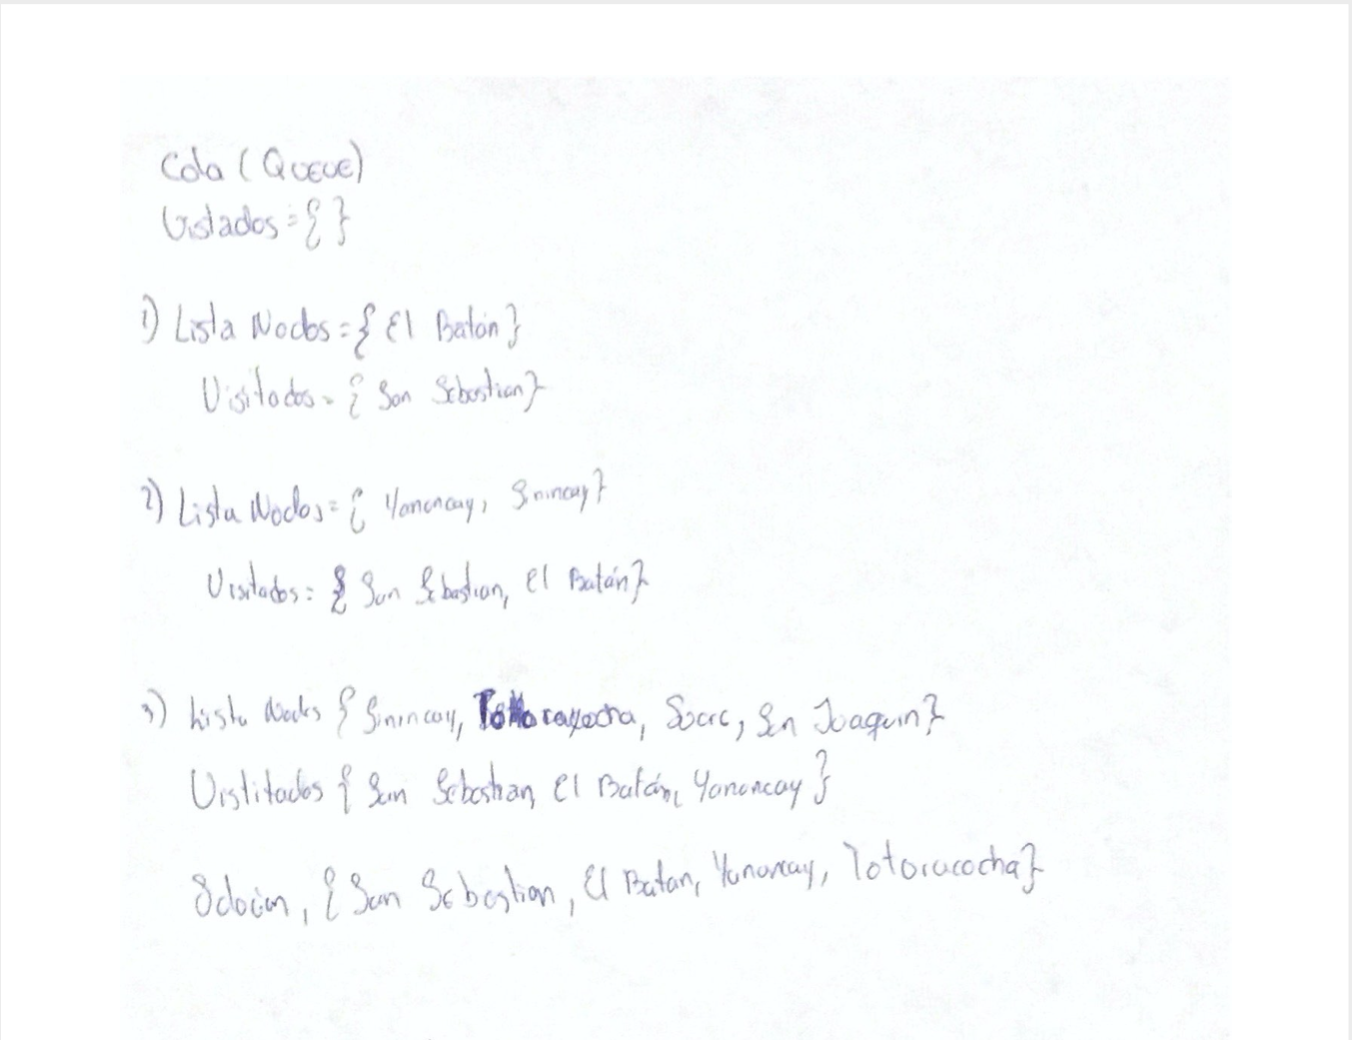

    Creacion de Nodos Lugares y con relaciones REL.

## Importar la API py2neo
    Para el ingreso de los datos que se encuentran dentro de la lista
## Conexión con Neo4j
    Configure la URL de conexión con la base de datos de Ne04j:
   ### graph = Graph("bolt://localhost:7687", aut="neo4j", password="amplitud", secure=False)  
   
       Creacion de los 11 lugares con sus relaciones.

In [1]:
#IMPORTAR py2neo
from py2neo import Node, Relationship, Graph


# connect to authenticated graph database
graph = Graph("bolt://localhost:7687", aut="neo4j", password="amplitud", secure=False)

In [5]:
graph.run(" CREATE (a:Lugar {name: 'El Vecino', latitude: -2.88121, longitude: -78.98748, h: 2.10}),"+
       "(b:Lugar {name: 'San Joaquin', latitude: -2.89372, longitude: -79.05041, h: 3.43}),"+
       "(c:Lugar {name: 'Yanuncay', latitude: -2.91577, longitude: -79.02834, h: 6.30}),"+
       "(d:Lugar {name: 'El Batan',latitude: -2.89626, longitude: -79.03309, h: 2.27}),"+
       "(e:Lugar {name: 'San Sebastian',latitude: -2.88892, longitude: -79.02435, h: 2.5}),"+
       "(f:Lugar {name: 'Bellavista',latitude: -2.88047, longitude: -79.00252, h: 1.89}),"+
       "(g:Lugar {name: 'Sucre',latitude: -2.90045, longitude: -79.01349, h: 2.13}),"+
       "(h:Lugar {name: 'Huayna-Capac',latitude: -2.91460, longitude: -78.99479, h: 3.73}),"+
       "(i:Lugar {name: 'Cañaribamba',latitude: -2.90512, longitude: -78.98441, h: 2.07}),"+
       "(j:Lugar {name: 'Totoracocha',latitude: -2.89002, longitude: -78.47327, h: 1.66}),"+
       "(k:Lugar {name: 'Ciudadela Calderon',latitude: -2.87642, longitude: -78.96756, h: 1.48}),"+
       "(m:Lugar {name: 'Sinincay',latitude: -2.84808, longitude: -79.01326, h: 5.65}),"+
       "(e)-[:REL {cost: 1.04}]->(d),"+
       "(m)-[:REL {cost: 10.3}]->(d),"+
       "(d)-[:REL {cost: 4.2}]->(c),"+
       "(b)-[:REL {cost: 5.9}]->(c),"+
       "(g)-[:REL {cost: 2.8}]->(c),"+
       "(j)-[:REL {cost: 10.8}]->(c),"+
       "(h)-[:REL {cost: 5.0}]->(j),"+
       "(i)-[:REL {cost: 3.0}]->(j),"+
       "(a)-[:REL {cost: 2.8}]->(j),"+
       "(f)-[:REL {cost: 3.0}]->(a),"+
       "(k)-[:REL {cost: 2.5}]->(a) ").data()






[]

    Consultar la creacion corecta de los nodos:
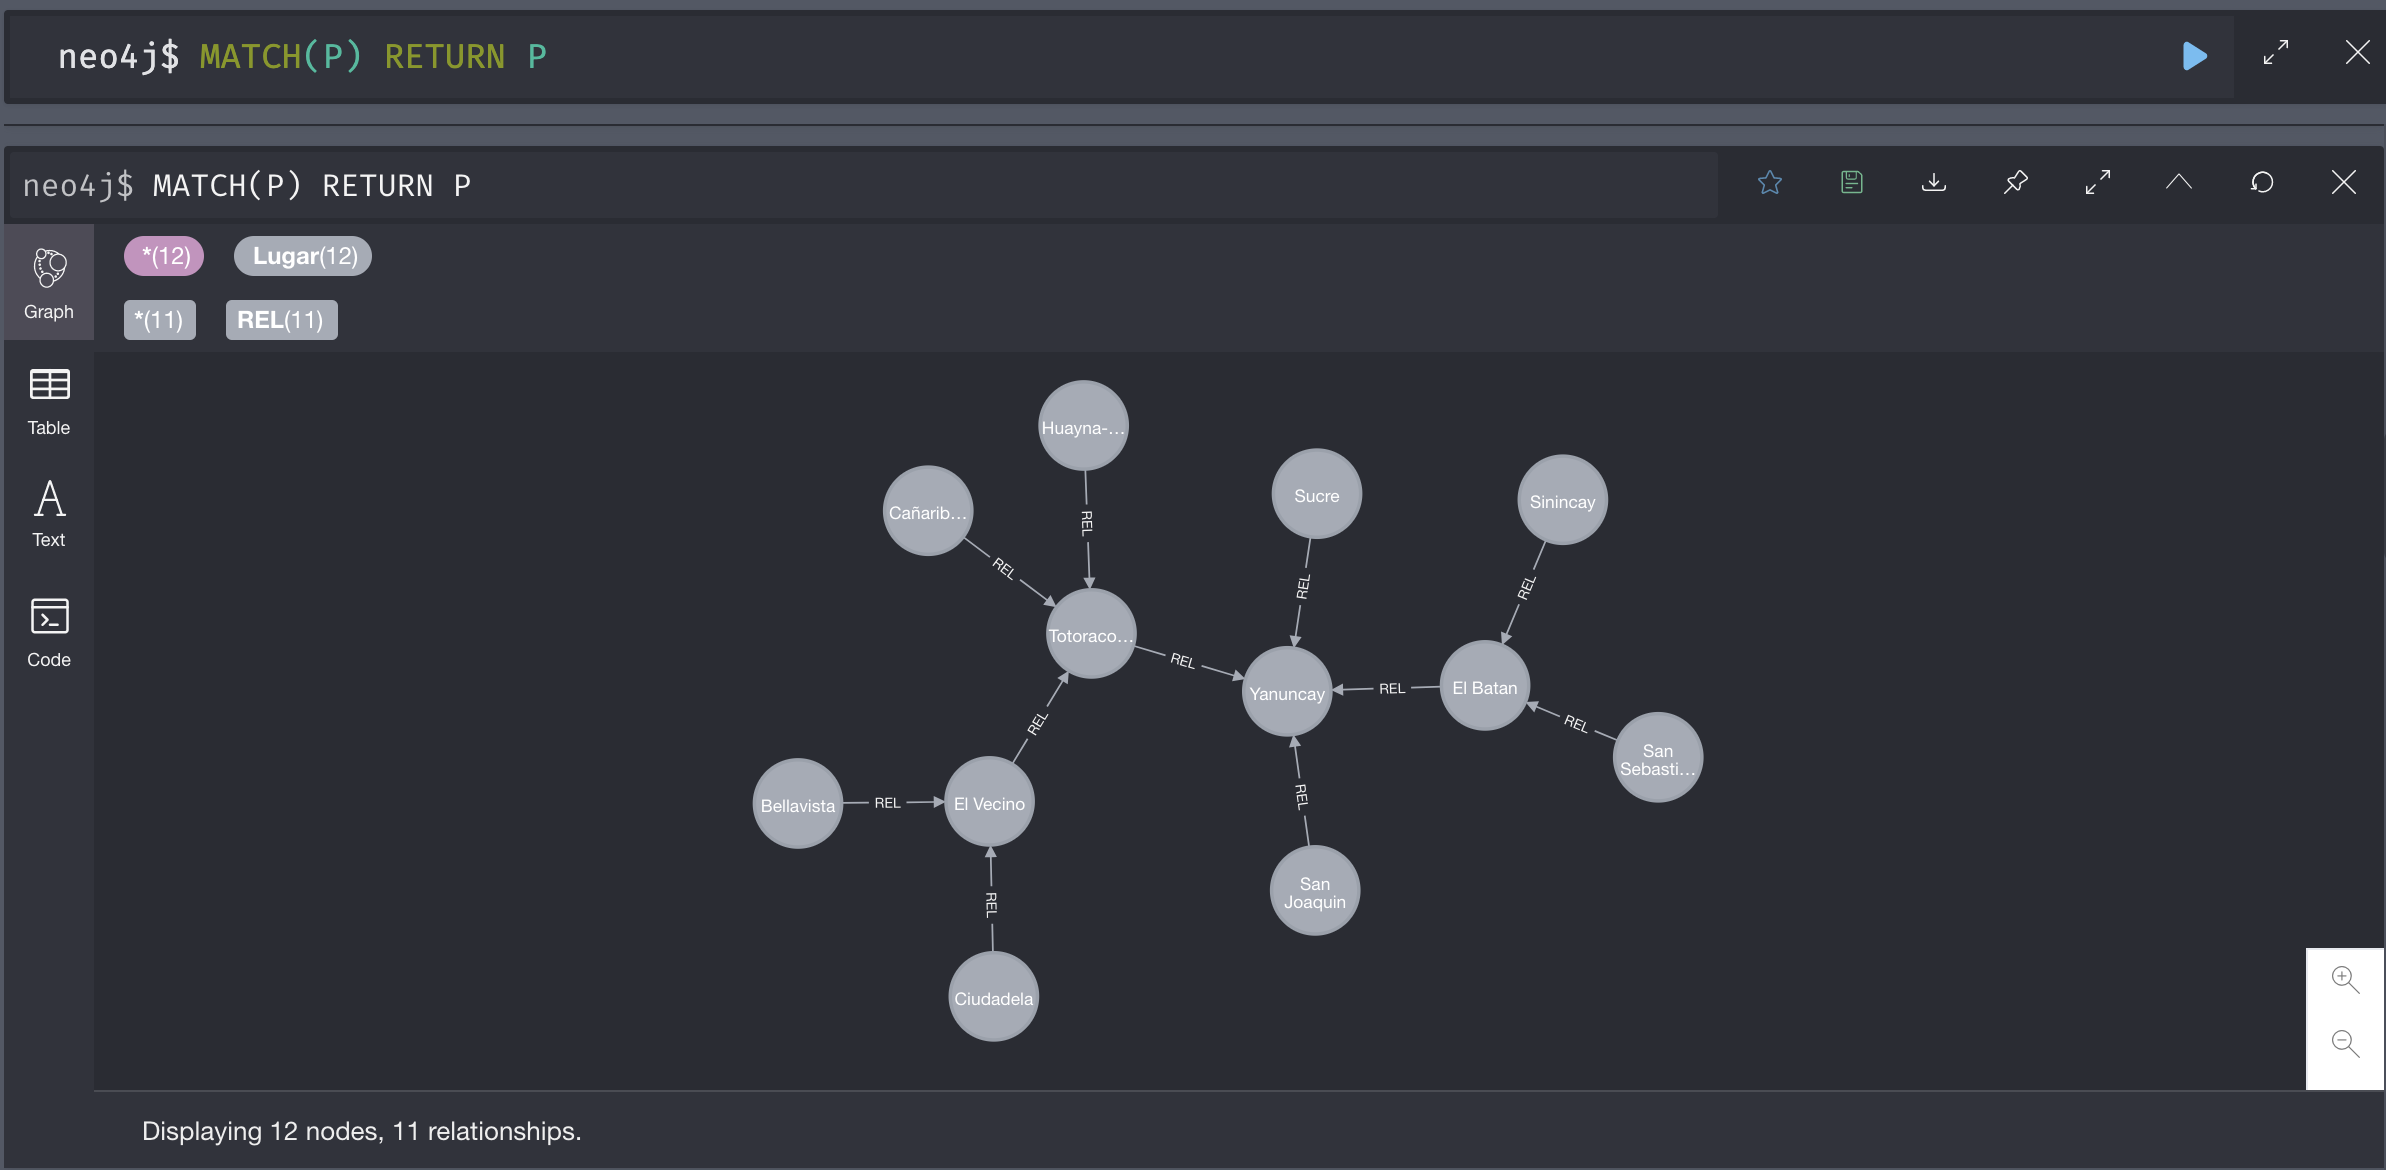

    Crear el gráfico el cual almacenará un catálogo de gráficos.
    
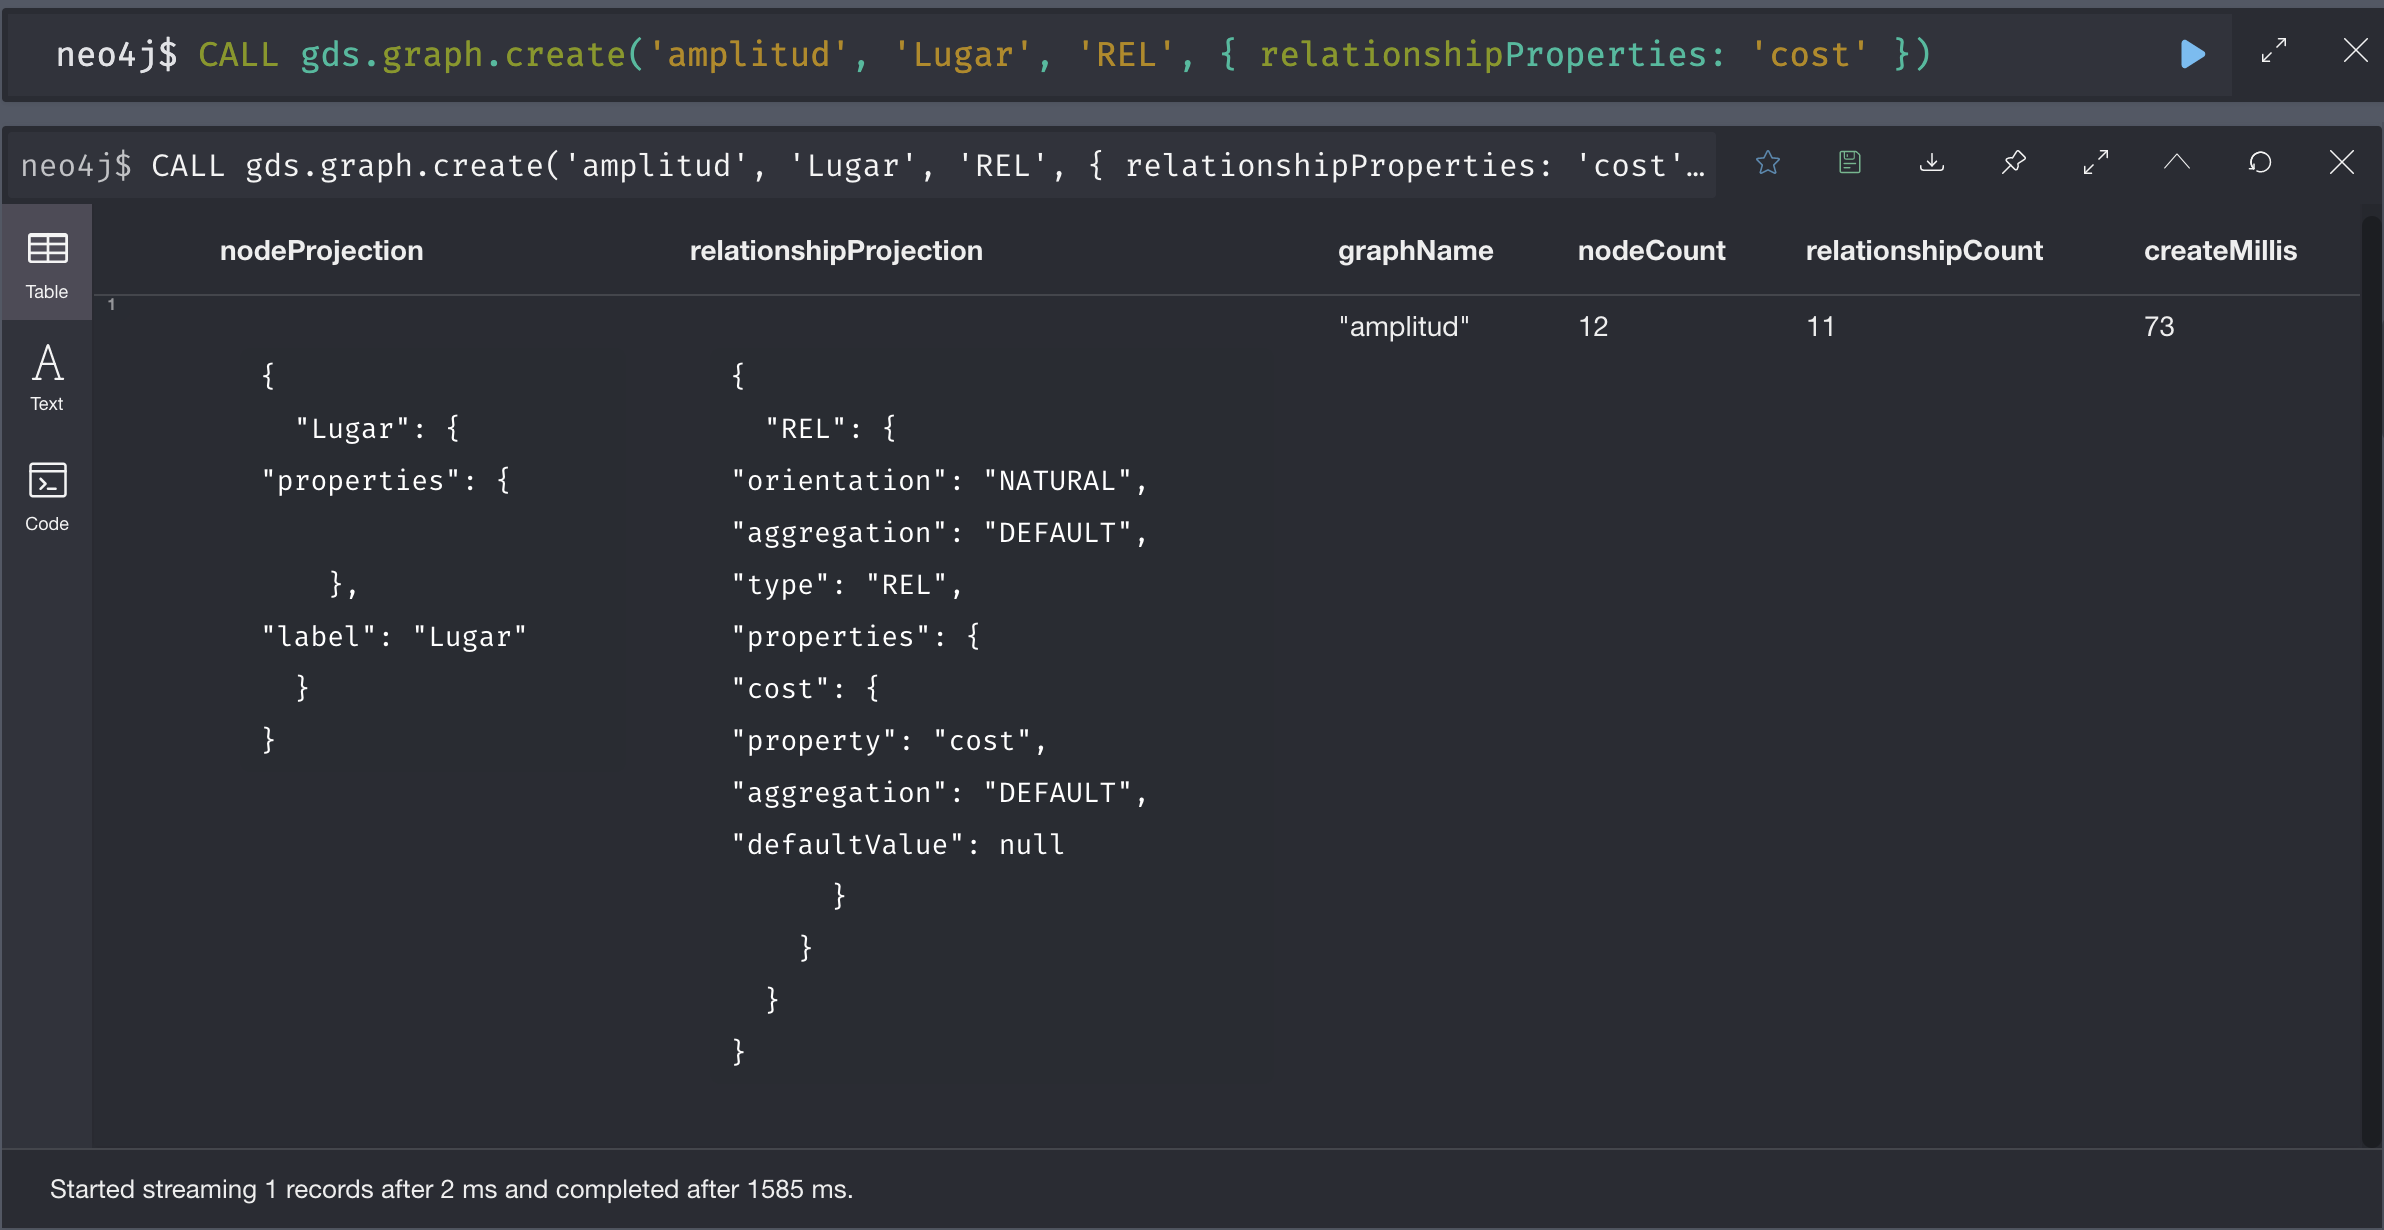

    Lo siguiente ejecutará el algoritmo y transmitirá los resultados:

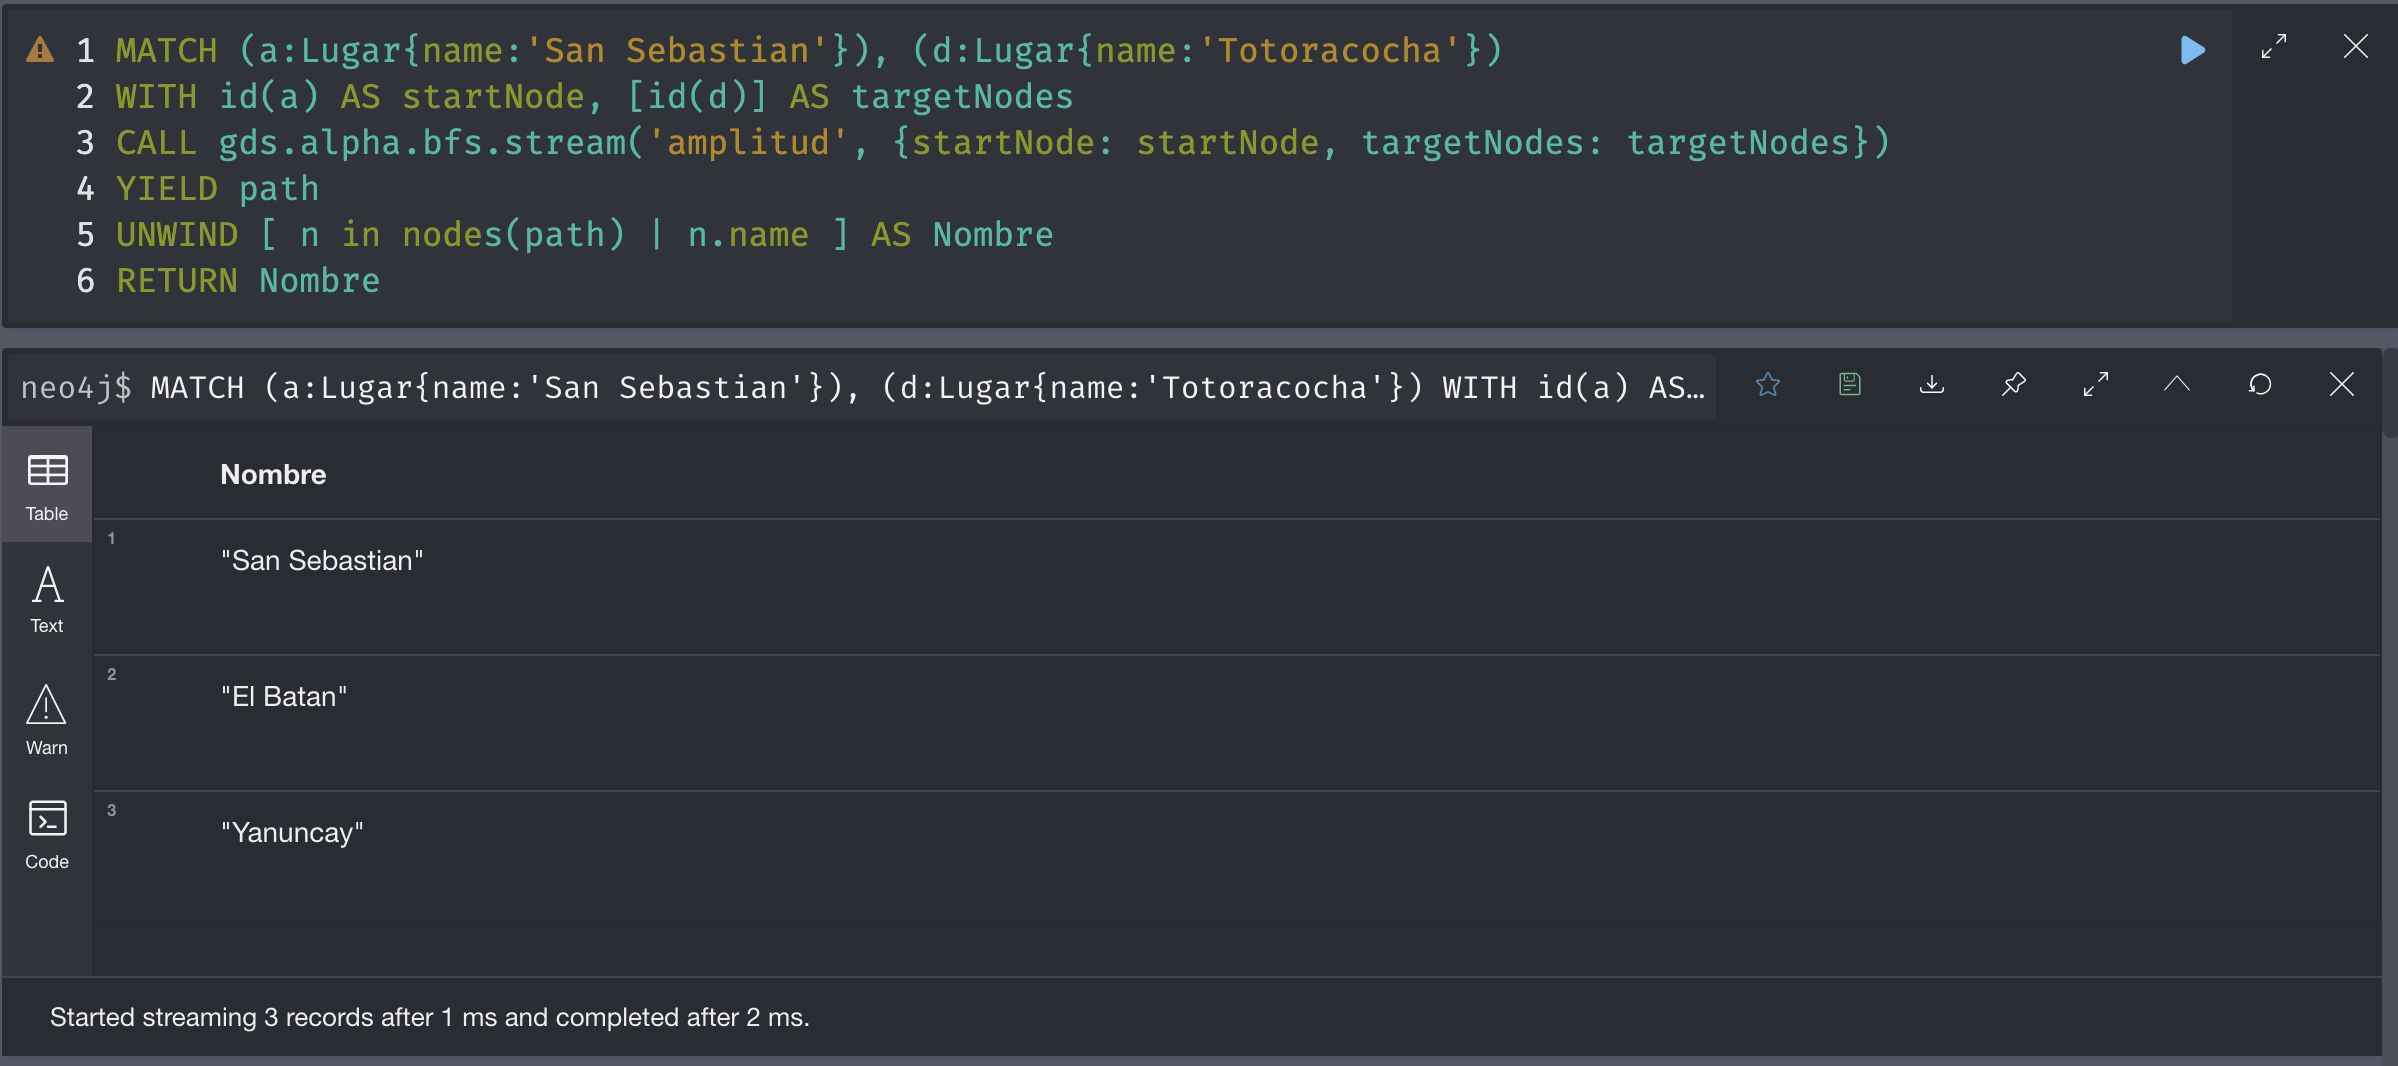

In [8]:
graph.run("MATCH (a:Lugar{name:'San Sebastian'}), (d:Lugar{name:'Totoracocha'})"+
          " WITH id(a) AS startNode, [id(d)] AS targetNodes"+
          " CALL gds.alpha.bfs.stream('amplitud', {startNode: startNode, targetNodes: targetNodes})"+
          " YIELD path"+
          " UNWIND [ n in nodes(path) | n.name ] AS Nombre"+
          " RETURN Nombre").data()

[{'Nombre': 'San Sebastian'}, {'Nombre': 'El Batan'}, {'Nombre': 'Yanuncay'}]